In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [121]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

engine = create_engine("sqlite:///hawaii.sqlite")

In [123]:
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [165]:
columns = inspector.get_columns('station')



'station'

In [ ]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [110]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [166]:
# Save references to each table
Measurement =Base.classes.measurement
Station=Base.classes.station

In [167]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [ ]:
prev_year = dt.date(2017, 8, 23)


('2016-08-24', 0.08)


In [66]:
df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-23  2016-08-23            NaN
2016-08-23  2016-08-23           1.79
2016-08-23  2016-08-23           0.05
2016-08-23  2016-08-23           0.15
...                ...            ...
2017-08-22  2017-08-22           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.08
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

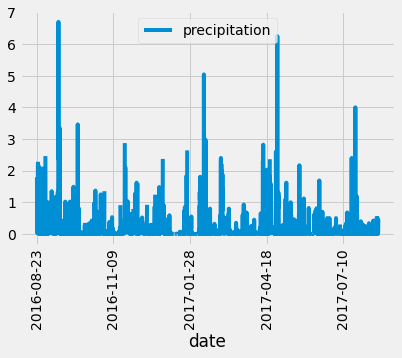

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

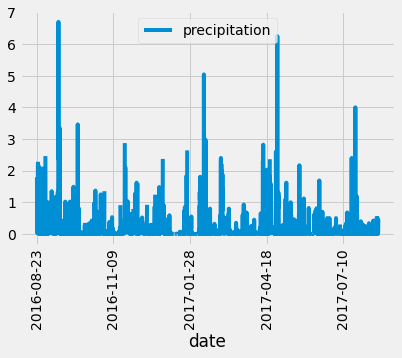

In [104]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df.to_string(index=False)
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)

In [101]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [133]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()





[(9,)]

In [144]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).all

# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [191]:

data = engine.execute("SELECT * FROM measurement")
data.all()
  


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [181]:
data = engine.execute("SELECT * FROM station")
data.all()



[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [188]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [202]:

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])

# df.set_index(df['tobs'],inplace=True) 
print(df.to_string(index=False))


 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

<AxesSubplot:ylabel='Frequency'>

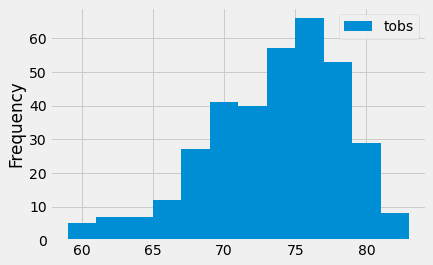

In [203]:
df.plot.hist(bins=12)


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 


# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge